# Versuch 2: Statistik II  (Dart & Abschlussfeier)

In [ ]:
# Name: Finn Jannik Wagner
# Matrikelnummer: 8102237
# Emailadresse: finn.jannik.wagner@physik.uni-giessen.de
# Studiengang: Physik
# Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen beantworten. Speichern Sie dieses Notebook als PDF ab. Es stellt Ihr Versuchsprotokoll dar.

##### Aufgabenstellungen:
###### Dart
Ein Spieler wirft Dartpfeile auf eine quadratische Fläche.  <br>
<br> a) Führen Sie mit Hilfe der Funktion mc_sim(n, r = 1, func = "pi", norm = False, save = "example") eine Monte-Carlo Simulation zur Bestimmung der Kreiszahl $\large{\pi}$ durch. Benutzen Sie dabei i) $n=100$ und ii) $n=1000$ iii) $n=10000$ zufallsgenerierte Punkte. Vergleichen Sie die Werte mit einem aktuellen Literaturwert. <br> <br> 
b) Welche Annahme muss für den Dartspieler gelten, damit die Simulation ein verlässliches Ergebnis liefert? <br>  <br>
c) Nun kommt ein weiterer Spieler hinzu. Um dies darzustellen, werden für die Simulation normalverteilte Datenpunkte (grün) generiert (benutzen Sie dafür bei der Funktion mc_sim() das Argument "norm = [0, 0.1]"). Welchem Sachverhalt entspricht diese Simulation?  Könnte $\large{\pi}$ nur aus den Ergebnissen dieses Spielers berechnet werden? <br> <br>

d) Führen Sie mit Hilfe der Funktion mc_sim(n = 10000, func = "gauss", norm = False, save = "example") eine Monte-Carlo Simulation zur Bestimmung des Flächeninhalts der Funktion $f(x)=e^{-\frac{x^2}{2}}$ im Intervall $[-10,10]$ durch. Benutzen Sie dafür i) $n=100$ und ii) $n=1000$ und iii) $n=10000$ zufallsgenerierte Punkte. Vergleichen Sie die Werte mit dem Literaturwert. Gehen Sie hierfür davon aus, dass näherungsweise die Fläche über das Intervall $(- \infty, \infty)$ betrachtet wird. <br> <br>


e) Überlegen Sie sich, wie man $\large{\pi}$ berechnen kann, wenn man den Flächeninhalt aus (d) vorliegen hat. Vergleichen Sie den so erhaltenen Wert für  $\large{\pi}$  mit einem Literaturwert. Was passiert, wenn man die Intervallgrenzen der Monte-Carlo-Integration ändert? Wie kann man die Ergebnisse erklären?

###### Abschlussfeier
f) Auf der Abschlussfeier der Physik einer sehr großen Universität soll ein Walzer getanzt werden. Die "Herrenschritte" beherrschen 100 StudentInnen (kurz bezeichnen wir diese vereinfacht als "Herren"). Die "Damenschritte" hingegen beherrschen 1000 StudentInnen (kurz bezeichnen wir diese als "Damen"). <br><br>
Gehen wir davon aus, dass aufgrund des Überangebots an Damen nur die Herren mit verschiedenen Damen tanzen, die Damen aber am Tisch sitzen bleiben und am ganzen Abend nur mit einem Herr tanzen. Nun kann es also dazu kommen, dass einige Damen keinen Partner finden und manche Herren sogar von mehreren Damen gefragt werden, ob sie zusammen tanzen wollen. Betrachten wir nun also die Personen, welche die Herrenschritte beherrschen und ordnen Ihnen Damen zu. Dies kann wie folgt aussehen: 

    - Person 1: eine Dame als Partner*in
    - Person 2: - 
    - Person 3: 10 Damen als Partner*innen
    - ...
    - Person 100: 5 Damen als Partner*innen


Wir simulieren dies mit einem Modell.

Benutzen Sie dazu die Funktion mc\_sim(n, r, func = "grid", norm = False, save = "example"). Dadurch wird ein  $r*r$  Gitter ("Schachbrett") erstellt wird. Dabei wird jedes der  $r*r$ Felder zufällig mit Punkten (Damen) gefüllt. Dann wird die Anzahl der Punkten (Damen) pro Feld (Herr) gezählt und in einem Histogramm geplottet. 

Wir können natürlich beliebige Feiergrößen betrachten. 
Verwenden Sie <br>
i) $n=1000$ & $r=10$ (das Beispiel aus der Aufgabenstellung) und <br> 
ii) $n=25000$ & $r=50$,<br>
iii) $n=100000$ & $r=100$ <br>
Dabei bezeichnet n die Anzahl an Damen, welche mit einem Herr tanzen möchten. Welche Bedeutung hat r in Bezug auf die Aufgabe?

Vergleichen Sie (optisch) die erhaltenen Werte mit den theoretischen Werten. Welcher Verteilung entspricht das resultierende Histogramm der experimentellen Werte? Welcher Verteilung entspricht das resultierende Histogramm der theoretischen Werte(werden mit geplottet)? Geben Sie die jeweiligen Parameter der Wahrscheinlichkeitsverteilung an (z.B. "p" oder "a" in den Formeln in der Anleitung). 

ACHTUNG: Die Berechnung der Werte kann, je nach Hardware, durchaus einige Minuten dauern! Bitte kontaktieren Sie uns, sollten Sie einen "Runtime Error" erhalten)

g) Nutzen Sie die Ergebnisse aus Aufgabe (f). Wie groß ist die Wahrscheinlichkeit, dass drei Damen mit einem Herr tanzen möchten? Diese Werte werden als Zahlenreihe unter den Histogrammen ausgegeben. Lesen Sie die richtigen Werte ab. Vergleichen Sie diese Werte mit dem theoretischen Wert für $ P(\lambda ,k)=\frac{\lambda ^k}{k!}e^{-\lambda}$. Was fällt Ihnen auf?




In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy.special import factorial as fak

In [2]:
def mc_sim(n, r, func, norm = False, save = False): 
    
    """
    mc_sim(n, r, func, norm, save)
    
    n = Anzahl der Dartwürfe (Integer)
    
    r = Radius des Kreises (Aufgabe a) ),                    (Integer)
        bzw. Intervall [-r, r] des Integrals (Aufgabe d) ),  (Integer)
        bzw. rxr Schachbrettmuster (Aufgabe e) ),            (Integer)

    func = "pi" (approximiert Pi und gibt "Dartplot" aus),
           "gauss" (approximiert Fläche unter der Gausskurve und gibt "Dartplot" aus),
           "grid" (plottet Verteilung der Anzahl der Events pro Feld gegen theoretische Verteilung)
    
    """
    x_in = np.array([])
    y_in = np.array([])
    
    if (func == "pi"):
        x = [rnd.uniform(-r,r)for i in range(n)]
        y = [rnd.uniform(-r,r)for i in range(n)]
      
        for i in range(n):
            if np.sqrt(x[i]**2+y[i]**2)<=r:
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
                
    elif (func == "gauss"):
        x = [rnd.uniform(-r,r)for i in range(n)]
        y = [rnd.uniform(0,1)for i in range(n)]
       
        f = np.exp(-(np.array(x)**2 /2) )
        for i in range (n):
            if ((y[i] <= 0) and (y[i] >= f[i])):
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
            elif ((y[i] >= 0) and (y[i] <= f[i])):
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
                
    elif (func == "grid"):
        x = np.array([rnd.uniform(0,1)for i in range(n)])
        y = np.array([rnd.uniform(0,1)for i in range(n)])
        points = np.array([])
        for i in range (r):
            for j in range (r):
                check1 = ( (x >= j /r) & (x < (j+1) /r) )
                check2 = ( (y[check1] >= i /r) & ( y[check1] < (i+1) /r) )
                points = np.append(points, sum(check2) )
        real_dist = np.array([4.53999298e-05, 4.53999298e-04, 2.26999649e-03, 7.56665496e-03, 1.89166374e-02, 3.78332748e-02, 6.30554580e-02, 9.00792257e-02,1.12599032e-01, 1.25110036e-01, 1.25110036e-01, 1.13736396e-01,9.47803301e-02, 7.29079462e-02, 5.20771044e-02, 3.47180696e-02,2.16987935e-02, 1.27639962e-02, 7.09110899e-03, 3.73216263e-03,1.86608131e-03, 8.88610150e-04, 4.03913704e-04, 1.75614654e-04,7.31727725e-05, 2.92691090e-05, 1.12573496e-05, 4.16938875e-06,1.48906741e-06, 5.13471521e-07])
        amount=plt.hist(points, bins = np.arange(31), density = True, color = "limegreen", label = "experimentelle Werte")
        plt.bar(np.arange(30),real_dist, color = "black", width = 0.4, label = "theoretische Werte")
        plt.legend()
        plt.show()
        print("Häufigkeitswerte (y-Werte des Histogramms): ", amount)
        
    if (func != "grid"):    
        area = len(x_in)/len(x)
        plt.scatter(x, y)
        plt.scatter(x_in, y_in)
    
        if (norm != False):
            plt.scatter([rnd.normal(norm[0], norm[1])for i in range(n)], [rnd.normal(norm[0], norm[1])for i in range(n)])
        plt.show()

        if (func == "pi"):
            print(4*area)
            return 4*area

        elif (func == "gauss"):
            print(2*r*area)
            return 2*r*area


### Dart

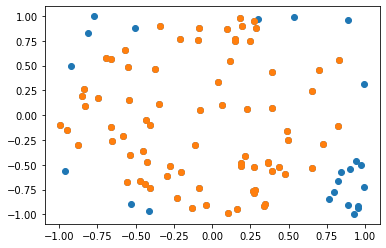

3.08


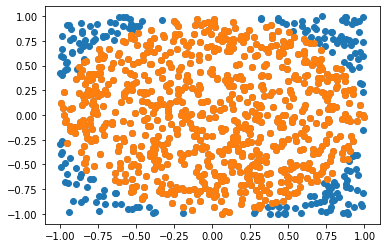

3.136


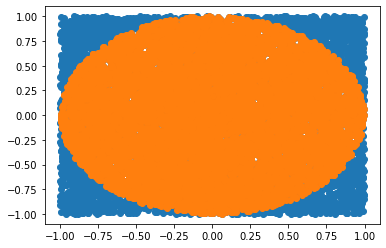

3.1412
3.08 3.136 3.1412


'\nErster Durchlauf:\n    n=100:   3.08\n    n=1000:  3.108\n    n=10000: 3.096\n    \nZweiter Durchlauf:\n    n=100:   3.04\n    n=1000:  3.196\n    n=10000: 3.0948\n'

In [7]:
#Aufgabe a)

"""
Führen Sie mit Hilfe der Funktion mc_sim(n, r = 1, func = "pi", norm = False, save = "example")
eine Monte-Carlo Simulation zur Bestimmung der Kreiszahl 𝜋 durch.
Benutzen Sie dabei i) 𝑛=100 und ii) 𝑛=1000 iii) 𝑛=10000 zufallsgenerierte Punkte.
Vergleichen Sie die Werte mit einem aktuellen Literaturwert. 
"""

#i)
ergebnis1 = mc_sim(n = 100, r = 1, func = "pi", norm = False)

#ii)
ergebnis2 = mc_sim(n = 1000, r = 1, func = "pi", norm = False)

#iii)
ergebnis3 = mc_sim(n = 10000, r = 1, func = "pi", norm = False)


print(ergebnis1, ergebnis2, ergebnis3)
#Denken Sie bitte daran, alles 3x auszuführen und die Ergebnisse zu dokumentieren
"""
Erster Durchlauf:
    n=100:   3.08
    n=1000:  3.108
    n=10000: 3.096
    
Zweiter Durchlauf:
    n=100:   3.04
    n=1000:  3.196
    n=10000: 3.0948

Dritter Durchlauf:
    n=100:   3.08
    n=1000:  3.136
    n=10000: 3.1412
    
Mittelwerte:
    µ_1 = (3.08 + 3.04 + 3.08)/3 = 3.06

    TODO Quelle PI angeben casio, numpy np.pi 2 oder 3 nachkommastellen
    Signifikante untersheidung bei welcher nachkommastelle?
"""

In [2]:
# Wie berechnet man den Mittelwert dreier Ergebnisse?
# Anleitung: schreiben Sie z.B. (3.1+3.2+3.3)/3
#Hier ein Testbeispiel
(3.1+3.2+3.3)/3

3.2000000000000006

In [2]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus (a)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel
?

3.2000000000000006

In [17]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (a)
# Anleitung: wenn 3.2 Ihr Mittelwert war, dann schreiben Sie
# np.sqrt((3.0-3.2)**2+(3.1-3.2)**2+(3.3-3.2)**2)
#Hier ein Testbeispiel
np.sqrt((3.1-3.2)**2+(3.2-3.2)**2+(3.4-3.2)**2)

# TODO Wert ist das und das vergleichen sie die Werte drei mal ausger
# TODO Letzte Zelle vergleichen. Der Wert 3.14 ist am nächsten dran, dass liegt daran, dass ...
# Am Ende vergleich schreiben, stark abweichenden Zahlen schreiben bei n=10, bei n=1000, daraus
# folgt Werte verändern sich durch größere Stichproben welche Sachen haben Einfluss.
# Soll merken dass man verstanden hat. Vielleicht noch erklärende Zellen einfügen?. Die Aufgabenstellung
# und Versuchshintergrund nochmal deutlich machen.

0.22360679774997877

In [3]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (a)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel
?

In [ ]:
# Aufgabe b)
# Welche Annahme muss für den Dartspieler gelten, damit die Simulation ein verlässliches Ergebnis liefert?
# Geben Sie Ihre Antwort hier ein: (z.B. muss es ein guter oder schlechter Spieler sein?)

"""
Es muss ein sehr schlechter Spieler sein, der wirklich zufällig in Richtung Schweibe wirft und nicht zielt. TODO
"""

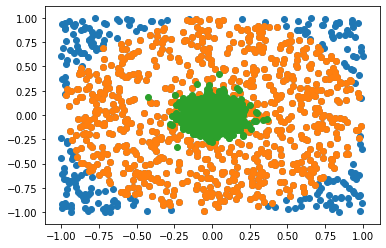

3.076


3.076

In [13]:
# Aufgabe c)
mc_sim(n = ?, r = 1, func = "pi", norm = [?,?])
# Ein Spieler der wirklich in die Mitte der Scheibe zielt wird hinzugefügt.

In [18]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus (c)
# Anleitung: schreiben Sie z.B. (3.1+3.2+3.3)/3
?

3.1999999999999997

In [19]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (c)
# Anleitung: wenn 3.2 Ihr Mittelwert war, dann schreiben Sie
# (3.0-3.2)**2+(3.1-3.2)**2+(3.3-3.2)**2
?

0.28284271247461895

In [ ]:
# Geben Sie Ihre Antwort hier ein:
# "Sollte man Pi nur anhand der Ergebnisse dieses Spielers bestimmen?"

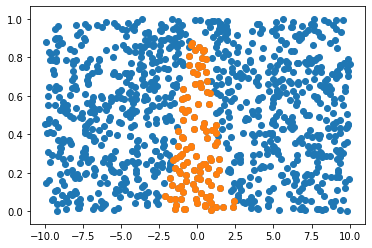

2.2


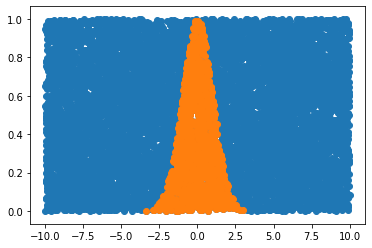

2.494


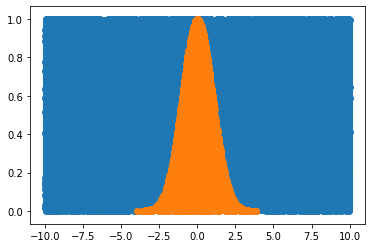

2.4948
Literaturwert: 2.5066282746310002


In [60]:
# Aufgabe d) 
mc_sim(n = ?, r = 10, func = "gauss", norm = False)
mc_sim(n = ?, r = 10, func = "gauss", norm = False)
mc_sim(n = ?, r = 10, func = "gauss", norm = False)
print("Literaturwert:", np.sqrt(np.pi * 2))

In [22]:
# Aufgabe e)
# Geben Sie Ihre Antwort hier ein:
# "Wie kann man mit dem Ergebnis von d) Pi bestimmen?"

### Abschlussfeier

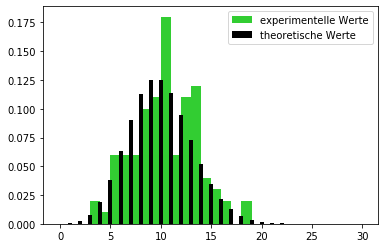

(array([0.  , 0.  , 0.  , 0.02, 0.01, 0.06, 0.06, 0.06, 0.1 , 0.11, 0.18,
       0.06, 0.11, 0.12, 0.04, 0.03, 0.02, 0.  , 0.02, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), <a list of 30 Patch objects>)


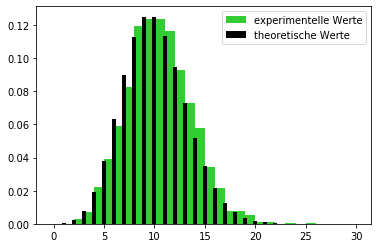

(array([0.    , 0.    , 0.0032, 0.0072, 0.022 , 0.0392, 0.0592, 0.0824,
       0.1196, 0.124 , 0.1236, 0.1164, 0.0928, 0.0728, 0.0576, 0.0344,
       0.0216, 0.008 , 0.008 , 0.0052, 0.0012, 0.0008, 0.    , 0.0004,
       0.    , 0.0004, 0.    , 0.    , 0.    , 0.    ]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), <a list of 30 Patch objects>)


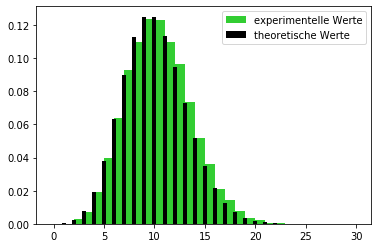

(array([0.000e+00, 1.000e-04, 3.200e-03, 6.900e-03, 1.900e-02, 3.950e-02,
       6.400e-02, 9.290e-02, 1.098e-01, 1.237e-01, 1.233e-01, 1.098e-01,
       9.670e-02, 7.380e-02, 5.160e-02, 3.590e-02, 2.090e-02, 1.460e-02,
       7.600e-03, 3.500e-03, 2.200e-03, 5.000e-04, 3.000e-04, 1.000e-04,
       0.000e+00, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), <a list of 30 Patch objects>)


In [47]:
#Aufgabe f) i)
mc_sim(n = ?, r = 10, func="grid", norm = False)
mc_sim(n = ?, r = 50, func = "grid", norm = False)
mc_sim(n = ?, r = 100, func="grid", norm = False)
#Denken Sie bitte daran, alles 3x auszuführen und die Ergebnisse zu dokumentieren

In [ ]:
# Ihre abgelesenen Werte bei...
(f)(i) P("1 Herr, 3 Damen") = ?, ?, ?
(f)(ii) P("1 Herr, 3 Damen") = ?, ?, ?
(f)(iii) P("1 Herr, 3 Damen") = ?, ?, ?

In [58]:
# Berechnen Sie jeweils den Mittelwert der drei Messungen für i), ii) und iii) 
# Anleitung: schreiben Sie z.B. (0.001+0.002+0.003)/3
?
# Notieren Sie hier: Mittelwert i), Mittelwert ii), Mittelwert iii)

0.002

In [59]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus (a)
# Anleitung: wenn 3.2 Ihr Mittelwert war, dann schreiben Sie
# (0.001-0.002)**2+(0.002-0.002)**2+(0.003-0.002)**2
?
# Notieren Sie hier Standabweichung i), Standardabweichung ii), Standardabweichung iii)

0.001414213562373095

In [53]:
# Nun berechnen wir noch den theoretischen Wert quasi wie im Taschenrechner
?
# np.exp(x) ist Exponentialfunktion exp(x)
# fak(x) oder np.math.factorial(x) ist Fakultätsfunktion
# x/y = Division
# a**b oder np.power(a,b) ist Potenz a hoch b

0.061313240195240384